<h3>Topic modeling - LDA</h3>
Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.
<br><br>
In this project we used LDA method to extract the main topics from description of cosmetics from our dataset. Before we started topic modeling we had to pre-process our data. We applied process in which sentences are converted to a list of tokens or words (i.e tokenizing), removed stopwords and lemmatizing (reduces the inflectional forms of each word into a common base or root). Finally we converted our text by using the bag of words model. Bag of words is a dictionary where the keys are words (or ngrams/tokens) and values are the number of times each word occurs in the corpus.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import gensim
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import gensim.corpora as corpora

import pyLDAvis
from pyLDAvis import gensim_models
import pyLDAvis.sklearn

In [3]:
df = pd.read_csv('data/makeup-products.csv', header=0, usecols=['description'])
df.head()

,description
0,Lippie Pencil A long-wearing and high-intensit...
1,Blotted Lip Sheer matte lipstick that creates ...
2,"Lippie Stix Formula contains Vitamin E, Mango,..."
3,"Developed for the Selfie Age, our buildable fu..."
4,All of our products are free from lead and hea...


In [11]:
df.isnull().sum()

description    0
dtype: int64

In [4]:
df.shape

(931, 1)

In [7]:
import texthero as hero
from texthero import preprocessing as ppe

In [54]:
custom_pipeline = [ ppe.fillna, ppe.lowercase, ppe.remove_punctuation, ppe.remove_stopwords, ppe.remove_whitespace, ppe.remove_digits]

df['description'] = hero.clean(df['description'], custom_pipeline)


c:\users\ajitrajput\appdata\local\programs\python\python37\lib\site-packages\texthero\preprocessing.py:131: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(rf"([{string.punctuation}])+", symbol)
c:\users\ajitrajput\appdata\local\programs\python\python37\lib\site-packages\texthero\preprocessing.py:72: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pattern, symbols)


In [55]:
lem = WordNetLemmatizer()

def word_lem(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [56]:
df['description']  = df['description'].apply(word_lem)
df.head()

,description
0,lippie pencil long wearing high intensity lip ...
1,blotted lip sheer matte lipstick creates perfe...
2,lippie stix formula contains vitamin e mango a...
3,developed selfie age buildable full coverage n...
4,product free lead heavy metal parabens phthala...


In [57]:
df['description'][0]

'lippie pencil long wearing high intensity lip pencil glide easily prevents feathering many lippie stix coordinating lippie pencil designed compliment perfectly feel free mix match'

<h3>Topic modeling - LDA</h3>

In [58]:
corpus = hero.tokenize(df['description'])
corpus[0:1]

c:\users\ajitrajput\appdata\local\programs\python\python37\lib\site-packages\texthero\preprocessing.py:598: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()


0    [lippie, pencil, long, wearing, high, intensit...
Name: description, dtype: object

We create the bag of words model using gensim:

In [59]:
dic = corpora.Dictionary(corpus)

bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [60]:

# View
print(bow_corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1)]]


In [61]:
dic[0]

'compliment'

In [62]:
# Human readable format of corpus (term-frequency)
[[(dic[id], freq) for id, freq in cp] for cp in bow_corpus[:1]]

[[('compliment', 1),
  ('coordinating', 1),
  ('designed', 1),
  ('easily', 1),
  ('feathering', 1),
  ('feel', 1),
  ('free', 1),
  ('glide', 1),
  ('high', 1),
  ('intensity', 1),
  ('lip', 1),
  ('lippie', 3),
  ('long', 1),
  ('many', 1),
  ('match', 1),
  ('mix', 1),
  ('pencil', 3),
  ('perfectly', 1),
  ('prevents', 1),
  ('stix', 1),
  ('wearing', 1)]]

<h3>Building the Topic Model</h3>

In [63]:
# We choose 20 topics
lda_model = LdaMulticore(bow_corpus, num_topics = 20, id2word = dic, passes = 10, workers = 8)

In [64]:
lda_model.print_topics()

[(0,
  '0.055*"lash" + 0.023*"mascara" + 0.015*"brush" + 0.012*"acid" + 0.012*"ingredient" + 0.011*"carnauba" + 0.010*"formula" + 0.008*"volume" + 0.008*"natural" + 0.007*"water"'),
 (1,
  '0.019*"pencil" + 0.017*"lip" + 0.014*"line" + 0.012*"formula" + 0.011*"eye" + 0.011*"color" + 0.007*"liner" + 0.007*"feature" + 0.006*"natural" + 0.006*"glide"'),
 (2,
  '0.009*"concealer" + 0.007*"every" + 0.007*"available" + 0.006*"natural" + 0.006*"creamy" + 0.006*"colour" + 0.006*"pigment" + 0.006*"foundation" + 0.006*"allows" + 0.005*"paint"'),
 (3,
  '0.027*"natural" + 0.017*"look" + 0.014*"lash" + 0.010*"mascara" + 0.009*"color" + 0.009*"shade" + 0.008*"line" + 0.008*"ingredient" + 0.007*"makeup" + 0.007*"formula"'),
 (4,
  '0.043*"skin" + 0.020*"free" + 0.019*"foundation" + 0.019*"coverage" + 0.018*"oil" + 0.015*"formula" + 0.013*"natural" + 0.012*"finish" + 0.010*"powder" + 0.009*"makeup"'),
 (5,
  '0.017*"skin" + 0.017*"ci" + 0.013*"free" + 0.013*"glow" + 0.012*"mineral" + 0.012*"oxide" + 

<h3>Compute Model Perplexity and Coherence Score</h3>

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [65]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dic, coherence='c_v')
coherence = coherence_lda.get_coherence()
print('\nCoherence Score: ', coherence)


Perplexity:  -7.174426347939293

Coherence Score:  0.41669028199928804


<h3>Visualize the topics-keywords</h3>
Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart 

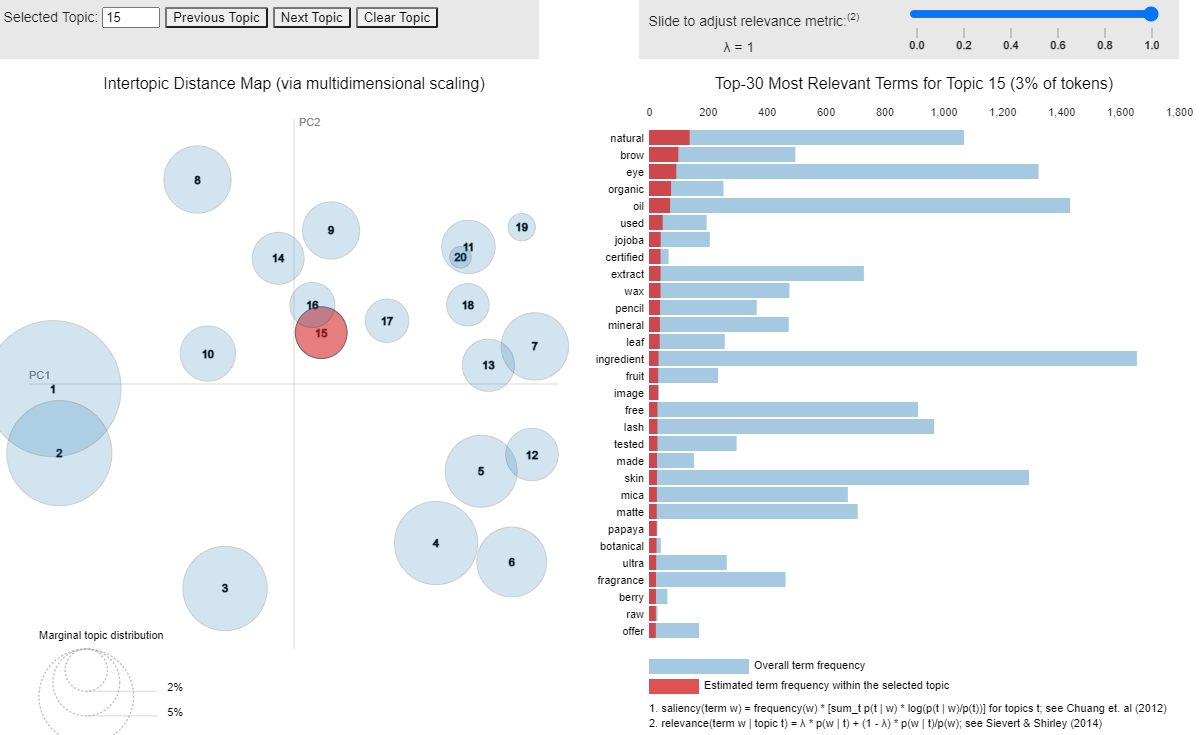

In [67]:
## Note : Due to some jupyter issue, the actual output of pyldavis (commented code) is saved as image and displayed as snapshot

# pyLDAvis.enable_notebook()
# lda_vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
# lda_vis

#Example of our lda gensim model
from IPython.display import Image
Image(filename="pyldavis.png")

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
<br>
A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.
<br>
A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.
<br>
As we can see from the graph, the bubbles are clustered or overlapped at certain places. <br><br> Can we do better than this?

<h3>LDA with Scikit-Learn</h3>

In [70]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,          
                            )

vectorized = vectorizer.fit_transform(df['description'])

In [71]:
model_lda = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1 
                                     )

lda_output = model_lda.fit_transform(vectorized)

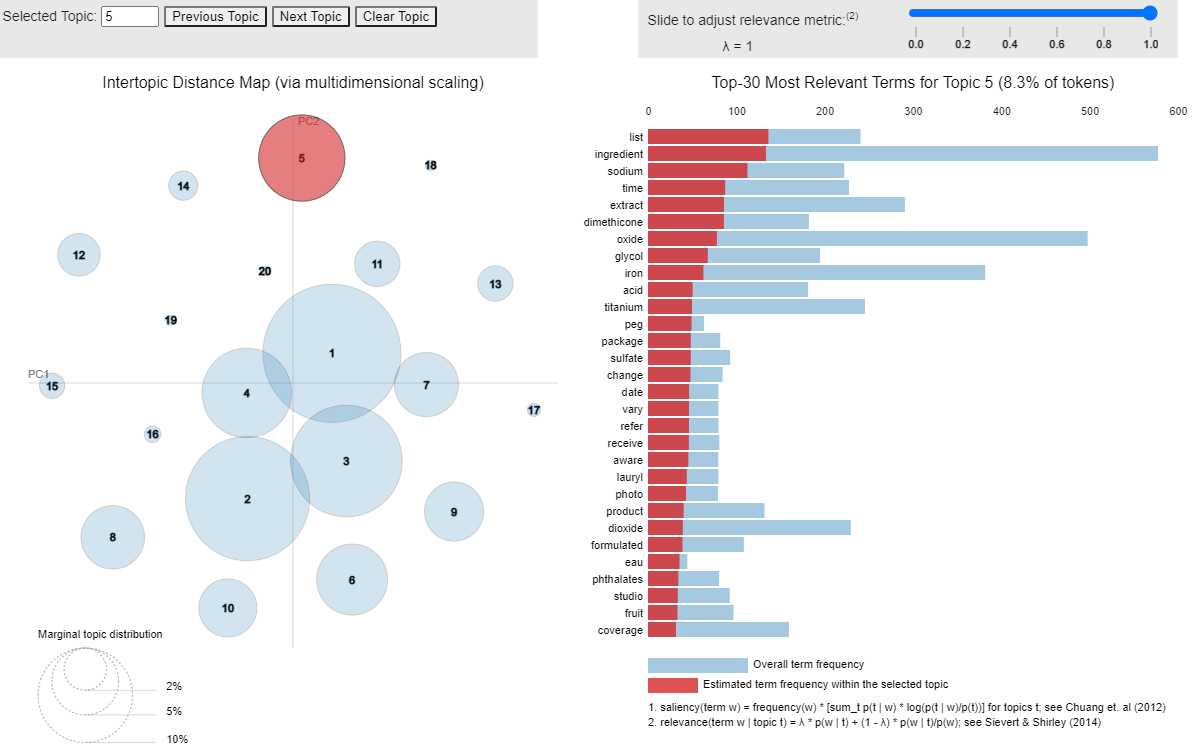

In [74]:
## Note : Due to some jupyter issue, the actual output of pyldavis (commented code) is saved as image and displayed as snapshot

# pyLDAvis.enable_notebook()
# pyLDAvis.sklearn.prepare(model_lda, vectorized, vectorizer, mds='tsne')

from IPython.display import Image
Image(filename="pyldavis-scikit.png")

By the using this method we have successfully built a good looking topic model